**Data Gathering and Data Preprocessing ****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,1
1,float64,30


In [7]:
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [8]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
30,Class,0,int64
0,Time,0,float64
1,V28,0,float64
2,V27,0,float64
3,V26,0,float64
4,V25,0,float64
5,V24,0,float64
6,V23,0,float64
7,V22,0,float64
8,V21,0,float64


In [9]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [10]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [11]:
const_features = find_constant_features(df)

In [12]:
const_features

[]

**Remove Duplicate Rows**

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.shape

(283726, 31)

*********Remove duplicate columns*********

In [15]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [16]:
duplicate_cols = duplicate_columns(df)

In [17]:
duplicate_cols
df.shape


(283726, 31)

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

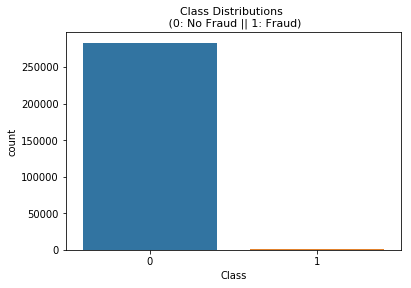

In [19]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=11)

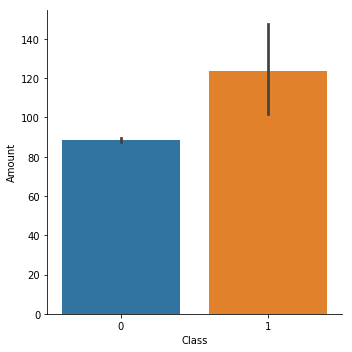

In [20]:

sns.catplot(x="Class",y="Amount",kind="bar",data=df);

In [21]:
amount = df['Amount'].values
time= df['Time'].values

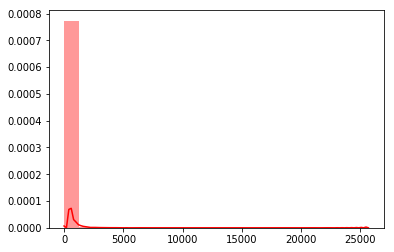

In [22]:
sns.distplot(amount,bins=20,color='r')

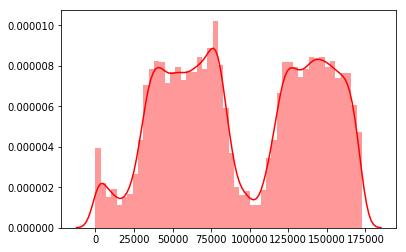

In [23]:
sns.distplot(time,bins=50,color='r')

************Correlation and Correlation with Target Variable********

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [25]:
from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


In [26]:

corr = df.corr(method = 'spearman')


In [27]:
layout = cf.Layout(height=600,width=600)
corr.abs().iplot(kind = 'heatmap', layout=layout.to_plotly_json(), colorscale = 'RdBu')

****************Find highly correlated features************

In [28]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [29]:
new_corr[new_corr.correlation > 0.3]

,level_0,level_1,correlation
703,V22,V21,0.677468
901,Amount,V2,0.502958
93,V3,Time,0.473833
895,V28,V27,0.458748
254,V8,V6,0.445178
222,V7,V5,0.430890
219,V7,V2,0.429022
798,V25,V23,0.426259
94,V3,V1,0.414041
255,V8,V7,0.387762


In [30]:
corr_with_target = df.corrwith(df.Class).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(20)
unique_values = df.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')

In [31]:
corr_with_unique

,index,correlation_with_target,unique_values
0,Class,1.000000,2
1,V11,0.149067,275663
2,V4,0.129326,275663
3,V2,0.084624,275663
4,V19,0.033631,275663
5,V8,0.033068,275663
6,V21,0.026357,275663
7,V27,0.021892,275663
8,V20,0.021486,275663
9,V28,0.009682,275663


In [32]:
df_major=df[df.Class==0]

In [33]:
df_minor=df[df.Class==1]

In [34]:
df_major.shape

(283253, 31)

In [35]:
from sklearn.utils import resample

In [36]:
df_minor_upsmapled = resample(df_minor, replace = True, n_samples = 283253, random_state = 2018)

In [37]:
df_minor_upsmapled.shape

(283253, 31)

In [38]:
final_data=pd.concat([df_minor_upsmapled,df_major])


In [39]:
final_data.shape

(566506, 31)

************Data Splitation and Standerdization************

In [40]:
X = final_data.drop('Class', axis = 1)
Y = final_data.Class

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

In [42]:
mms = StandardScaler()
mms.fit(xtrain)
xtrain_scaled = mms.transform(xtrain)
xtest_scaled = mms.transform(xtest)

In [43]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [45]:
logisticRegr = LogisticRegression()

In [46]:
logisticRegr.fit(xtrain_scaled, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr_pred = logisticRegr.predict(xtest_scaled)

In [48]:
evaluate_model(ytest, lr_pred)

Accuracy of the model: 0.9486467975739089

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     71094
           1       0.98      0.92      0.95     70533

    accuracy                           0.95    141627
   macro avg       0.95      0.95      0.95    141627
weighted avg       0.95      0.95      0.95    141627


Confusion matrix: 
[[69477  1617]
 [ 5656 64877]]



**********Random Forest**************

In [49]:
def random_forest(xtrain, xtest, ytrain):
    rf_params = {
        'n_estimators': 126, 
        'max_depth': 14
    }

    rf = RandomForestClassifier(**rf_params)
    rf.fit(xtrain, ytrain)
    rfpred = rf.predict(xtest)
    rfpred_proba = rf.predict_proba(xtest)
    
    return rfpred, rfpred_proba, rf

In [50]:
rfpred, rfpred_proba, rf = random_forest(xtrain_scaled, xtest_scaled, ytrain)

In [51]:
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score,                             classification_report, confusion_matrix

In [52]:
evaluate_model(ytest, rfpred, rfpred_proba)

ROC-AUC score of the model: 0.9999965234632542
Accuracy of the model: 0.9999082095928037

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71094
           1       1.00      1.00      1.00     70533

    accuracy                           1.00    141627
   macro avg       1.00      1.00      1.00    141627
weighted avg       1.00      1.00      1.00    141627


Confusion matrix: 
[[71081    13]
 [    0 70533]]

